# Linear and Auto Regressive Model

We are goin going to construct a model that predict deposit level data on a bank's balance sheet. I followed this tutorial here

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

# A.Setup

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import calendar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 1.Create the date range

In [54]:
months = list(range(1,13))
months
calendar.month_name[1]
year = [17,18,19]
date = []
for x in year:
    for i in months:
        date.append(str(calendar.month_name[i])+"-"+str(x))
date
#Will use period because of spacing in graph
p1 = []
period = np.array(range(0,36))
p1 = [[x] for x in period]
#p1 = np.array(p1)
p1

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35]]

## 2. Our Assumption for the growth in deposits
Growth in balance will follow the schedule below:<br>
1,2 3% increase <br>
3,4,5 5% increase <br>
6,7,8, 3% decrease <br>
9,10 5% increase <br>
11,12, 3% decrease <br>

In [55]:
assump = [1.03,1.03,1.05,1.05,1.05,0.97, 0.97,0.97,1.05,1.05,0.97,0.97]
assump = np.array(assump*3)
assump

array([1.03, 1.03, 1.05, 1.05, 1.05, 0.97, 0.97, 0.97, 1.05, 1.05, 0.97,
       0.97, 1.03, 1.03, 1.05, 1.05, 1.05, 0.97, 0.97, 0.97, 1.05, 1.05,
       0.97, 0.97, 1.03, 1.03, 1.05, 1.05, 1.05, 0.97, 0.97, 0.97, 1.05,
       1.05, 0.97, 0.97])

## 3. Get the balance from our assumption

In [56]:
# Applying our assumption to our balance
bal_seed = 100
bal = []
for x in assump:
    bal.append(bal_seed)
    bal_seed = x*bal_seed
bal = np.array(bal)
#bal = [[x] for x in bal]
bal

array([100.        , 103.        , 106.09      , 111.3945    ,
       116.964225  , 122.81243625, 119.12806316, 115.55422127,
       112.08759463, 117.69197436, 123.57657308, 119.86927589,
       116.27319761, 119.76139354, 123.35423534, 129.52194711,
       135.99804447, 142.79794669, 138.51400829, 134.35858804,
       130.3278304 , 136.84422192, 143.68643302, 139.37584003,
       135.19456482, 139.25040177, 143.42791382, 150.59930951,
       158.12927499, 166.03573874, 161.05466658, 156.22302658,
       151.53633578, 159.11315257, 167.0688102 , 162.05674589])

## 4. Plot the Balance

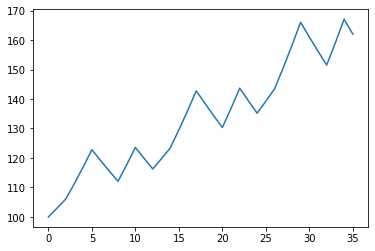

In [57]:
fig, ax = plt.subplots()
ax.plot(p1, bal)

## 5. Setting up the testing and training data set
We need to have training and test set for X and y and define a test size

In [58]:
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(p1, bal, test_size = 0.3, random_state=13)
print(X_train)
print(len(X_train))
print(X_test)
print(len(X_test))


[[35], [1], [33], [23], [6], [19], [0], [28], [11], [9], [34], [13], [5], [22], [14], [2], [20], [30], [3], [26], [12], [25], [16], [10], [18]]
25
[[7], [27], [17], [31], [29], [32], [4], [24], [15], [21], [8]]
11


# B.Linear Model

## 1. Call the Linear Regression Fucntion

In [59]:
regress = LinearRegression()
regress.fit(X_train, y_train)
accuracy = regress.score(X_test, y_test)
print(accuracy)

0.8476560783675015


## 2. Get the Predicted Values

In [60]:
y_pred = regress.predict(X_test)
X_test
#np.shape(y_pred)

[[7], [27], [17], [31], [29], [32], [4], [24], [15], [21], [8]]

In [61]:
#np.shape(y_test)

## 3. Compare Actual Values Against the Model Predicted One

In [62]:
dd = zip(y_test,y_pred)
df = pd.DataFrame(dd, columns=["Real Values", "Predicted"])
#df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(y_pred)}) #Results of y_pred is an array. Use list function to convert to 1 dimension
df

,Real Values,Predicted
0,115.554221,115.264935
1,150.599310,149.739100
2,142.797947,132.502018
3,156.223027,156.633933
4,166.035739,153.186516
5,151.536336,158.357641
6,116.964225,110.093811
7,135.194565,144.567975
8,129.521947,129.054601
9,136.844222,139.396851


## 4. Plot Actuals Deposit Balance Against Predicted Deposit Balances

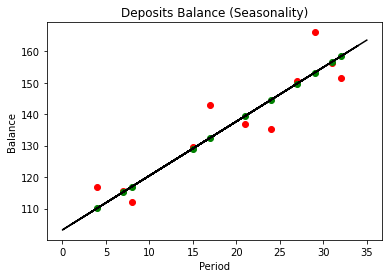

In [63]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_train, regress.predict(X_train), color = 'black')
plt.title('Deposits Balance (Seasonality)')
plt.xlabel('Period')
plt.ylabel('Balance')
plt.show()

In [64]:
#Now if we want to calculate the next value in period 36...
regress.predict([[36]])

array([165.25247401])

## 5. Calulate Root Meas Squared Error (Measure Model's Error) and LInear Relationship

In [65]:
np.sqrt(np.mean((y_test-y_pred)**2))

6.636328313885302

In [66]:
regress.score(X_test, y_test)

0.8476560783675015

For the most part, looks like there is  somewhat of linear relationship. Now lets try an auto regressive model that will better capture the time series data.

# C. Check For Stationality

First we are going to see if the data is stationary. The data is said to be stationary if:<br>
1.The mean of the series is not a function of time<br>
2.The variacen of the serise is not a function of time<br>
3.The covariance of the series is not a function of time<br>

There are a couple of ways to check if the data is stationary:<br>
1.Rolling statistic-ensure that the rolling mean and standard diviation is constant with time, seeing if the plotted mean and standard diviation is a straight line<br>
2.Augmented Dickey-Fuller Test-"The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics"

In [67]:
from statsmodels.tsa.stattools import adfuller

roll = pd.DataFrame(bal,index=period, columns=["Bal"])

## 1. Rolling Mean and Standard Deviation
We can use the pandas series and the call the rolling function with a 6 period window to get the rolling mean and standard deviation.

In [68]:
roll_m = pd.Series(bal).rolling(window=6).mean()
roll_std = pd.Series(bal).rolling(window=6).std()

## 2. Plotting the Data

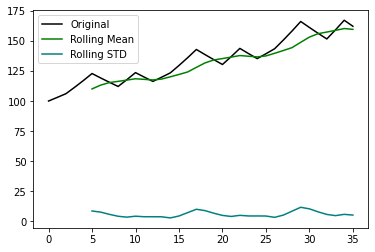

In [69]:
plt.plot(roll,color='black',label='Original')
plt.plot(roll_m,color='green',label='Rolling Mean')
plt.plot(roll_std,color='teal',label='Rolling STD')
plt.legend(loc = 'best')

#roll["6m roll mean"],roll["6m roll std"] = roll_m, roll_std #we could have easily put it in the roll data frame and plotted it
#plt.plot(roll)

From the above we can see that the data is not stationary. Even though the standard diveation appears constant, the rolling mean is increaseing over time. 

## 3. Augmented Dickey-Fuller Test 

Lets see the results of the use the augmented Dickey-Fuller Test. Here we are passing the Dickey Fullter test our date and making sure :<br>
1.p-value is low<br>
2.The critical value at, 1%, 5%, and 10% confidence interval is close to our ADF Statistic<br>

In [70]:
result = adfuller(bal)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.5313301368375396
p-value: 0.9976362120021459
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004


Here the p-value is high and the criticle values are not close to our test statistic, hence, the data is not stationary

# D. Making Time Series Data Sationary

## 1. Log
First we take the log of the data to lowers the rate at which the the rolling mean increase. We will be using this log data in the following transformation

In [71]:
log_bal = np.log(bal)

## 2. Transformation
There are several transformation we can apply to the log data.
<b>
<br><tr>Transformation #1:Rolling Mean
<br><tr>Transformation #2:Exponential Decay
<br><tr>Transformation #3:Time Shift
</b><br><br>
For the first two transformation, we will have to:
1. Get the <b>mean</b> of the transformation
2. Get the <b>difference</b> of the log data and the mean of the transfomration 
3. Get the rolling mean of the <b>difference</b>
4. Get the rolling standard deviation of the <b>difference</b>
5. Apply Dickey-Fuller Test

## 3. Lets see what the log, log mean and the difference look like

Text(0.5, 1.0, 'Log Graph')

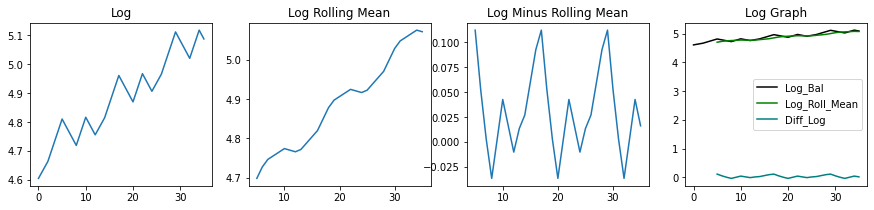

In [72]:
plt.figure(figsize=(15,3))
log_bal = np.log(bal)
plt.subplot(141)
plt.plot(log_bal)
plt.title("Log")

log_roll_mean = pd.Series(log_bal).rolling(window=6).mean()
plt.subplot(142)
plt.plot(log_roll_mean)
plt.title("Log Rolling Mean")

log_bal_minus_log_roll_mean = log_bal-log_roll_mean
log_bal_minus_log_roll_mean.dropna(inplace=True)
plt.subplot(143)
plt.plot(log_bal_minus_log_roll_mean)
plt.title("Log Minus Rolling Mean")

plt.subplot(144)
plt.plot(log_bal, color='black', label='Log_Bal')
plt.plot(log_roll_mean, color='green', label='Log_Roll_Mean')
plt.plot(log_bal_minus_log_roll_mean, color='teal', label='Diff_Log')
plt.legend(loc = 'best')
plt.title("Log Graph")

## 2. Create a function to make the analysis quicker

In [73]:
def get_stationarity(series):
    
    # rolling statistics
    rolling_mean = series.rolling(window=6).mean()
    rolling_std = series.rolling(window=6).std()
    
    # rolling statistics plot
    original = plt.plot(series, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(series)#***Need to fix
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

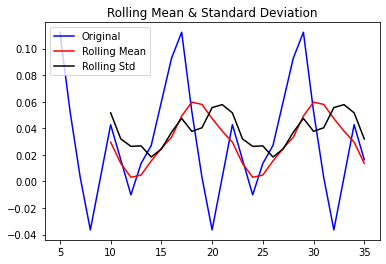

ADF Statistic: -8.69145865147132
p-value: 4.030075902936294e-14
Critical Values:
	1%: -3.7883858816542486
	5%: -3.013097747543462
	10%: -2.6463967573696143


In [74]:
get_stationarity(log_bal_minus_log_roll_mean)

Looking at the Dickey Fuller test, the data does not appear to be stationary. However we see that the rolling mean and standard deviation is no longer a function of time but still not horizontal

## F. Exponential Decay

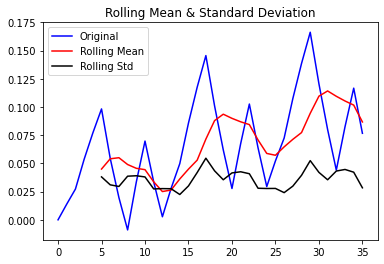

ADF Statistic: -0.6547627386996704
p-value: 0.8581217390299516
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004


In [75]:
df_log = pd.DataFrame(log_bal, columns=['Log_Bal'])
rolling_mean_exp_decay = df_log.ewm(halflife=6, min_periods=0, adjust=True).mean()
df_log_exp_decay_diff = df_log-rolling_mean_exp_decay
df_log_exp_decay_diff.dropna(inplace=True)
get_stationarity(df_log_exp_decay_diff)


Exponential Decay looks to performed worse. Rolling mena increases over time however, with the Fuller test, P-value is smaller than it was with the log, and test statistic is closer to the confidence interval


## G. Time Shifting
With time shifting we subtract one period from the period prior.

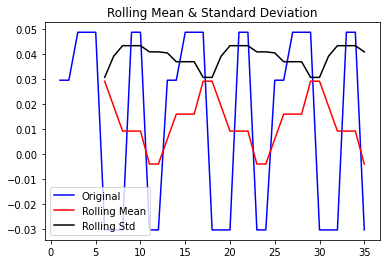

ADF Statistic: -68713918320291.74
p-value: 0.0
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [76]:
df_log_shift_diff = df_log - df_log.shift()
df_log_shift_diff.dropna(inplace=True)
get_stationarity(df_log_shift_diff)

This results looks worse, our best result for stationarity seems to be with the log subtracting the rolling mean.

Text(0.5, 1.0, 'Log Time Shift')

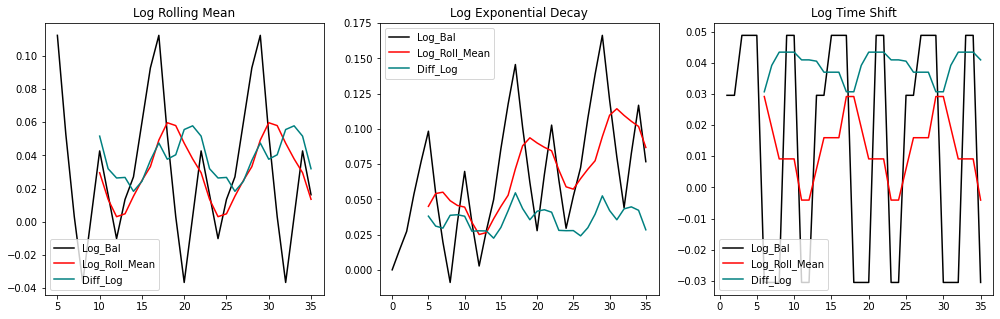

In [77]:
plt.figure(figsize=(17,5))

plt.subplot(131)
log_roll_mean = pd.Series(log_bal_minus_log_roll_mean).rolling(window=6).mean()
log_roll_st = pd.Series(log_bal_minus_log_roll_mean).rolling(window=6).std()
plt.plot(log_bal_minus_log_roll_mean, color='black', label='Log_Bal')
plt.plot(log_roll_mean,color='red', label='Log_Roll_Mean')
plt.plot(log_roll_st, color='teal', label='Diff_Log')
plt.legend(loc = 'best')
plt.title("Log Rolling Mean")


plt.subplot(132)
exp_decay_mean = df_log_exp_decay_diff.rolling(window=6).mean()
exp_decay_st = df_log_exp_decay_diff.rolling(window=6).std()
plt.plot(df_log_exp_decay_diff, color='black', label='Log_Bal')
plt.plot(exp_decay_mean,color='red', label='Log_Roll_Mean')
plt.plot(exp_decay_st, color='teal', label='Diff_Log')
plt.legend(loc = 'best')
plt.title("Log Exponential Decay")

plt.subplot(133)
time_shift_mean = df_log_shift_diff.rolling(window=6).mean()
time_shift_std = df_log_shift_diff.rolling(window=6).std()
plt.plot(df_log_shift_diff, color='black', label='Log_Bal')
plt.plot(time_shift_mean,color='red', label='Log_Roll_Mean')
plt.plot(time_shift_std, color='teal', label='Diff_Log')
plt.legend(loc = 'best')
plt.title("Log Time Shift")


Above we see the three transformation and it looks like the rolling mean shows appears most stationality

# H. Create and Fit an ARIMA
<i>The ordering here was determined from ACF and PACF, unsure how its calc

/home/hman/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


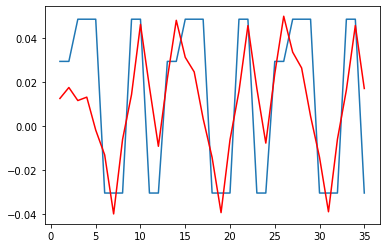

In [79]:
log_df = pd.DataFrame(log_bal, columns=['Bal'])
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
decomposition = seasonal_decompose(log_df,period=18)
model = ARIMA(log_df, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift_diff)
plt.plot(results.fittedvalues, color='red')

## 1. Model vs Original Times Series

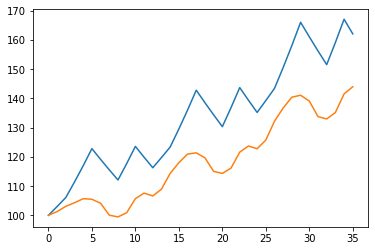

In [80]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(log_df['Bal'].iloc[0], index=log_df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(bal)
plt.plot(predictions_ARIMA)

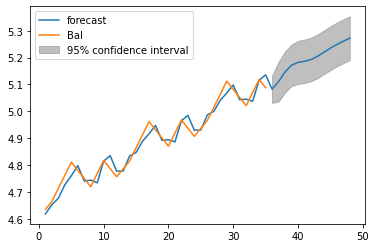

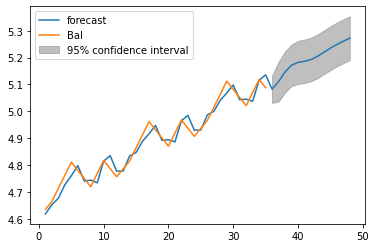

In [84]:
results.plot_predict(1,48) #(3 years data, 36 months, we want to forecast another year so we add 12 months, 36+12)